# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

/Users/aryanhemani/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/x1/w7v_rb6x76b1ltfzphz5s_900000gn/T/ipykernel_34897/1903281945.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
#df = pd.read_csv("/content/gdrive/MyDrive/W24ML Code/Data/fraudTest.csv")
df = pd.read_csv("fraudTest.csv")

In [6]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
#y = pd.DataFrame(df_select["is_fraud"])

y = df_select["is_fraud"]

/var/folders/x1/w7v_rb6x76b1ltfzphz5s_900000gn/T/ipykernel_34897/3601195566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/x1/w7v_rb6x76b1ltfzphz5s_900000gn/T/ipykernel_34897/3601195566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [7]:
df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17


In [8]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [11]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [14]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [17]:
over_log.score(X_test, y_test)

0.9264257779697209

In [18]:
under_log.score(X_test, y_test)

0.9092588593776242

In [19]:
smote_log.score(X_test, y_test)

0.9248902324911826

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [20]:
# Sensitivity here in credit fraud is more important as seen from last class

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_true = y_test

In [23]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77005,  6063],
       [   70,   220]])

In [24]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7586206896551724


In [25]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75573,  7495],
       [   69,   221]])

In [26]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7620689655172413


In [27]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76876,  6192],
       [   69,   221]])

In [28]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7620689655172413


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [29]:
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([X_train, y_train.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])




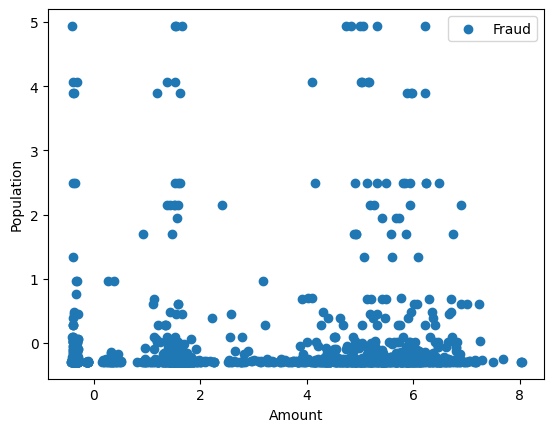

In [30]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

## - Make a dataframe that has a dual index and 9 Rows.
## - Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
## - Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
## - Choose what you think is the best model and why. Test on Holdout

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd

In [32]:
resampling_methods = { "over": RandomOverSampler(), "under": RandomUnderSampler(), "smote": SMOTE()}

model_configs = {"LOG" : LogisticRegression(),
                "LASSO" : LogisticRegression(penalty="l1", C=2., solver="liblinear"),
                "DTREE" : DecisionTreeClassifier()}

In [33]:
trained_models = {}
results = []

In [34]:
def calc_perf_metric(y_true, y_pred) :
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return (sensitivity, specificity, precision, recall, f1)

In [38]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({"Model" : combined_key,
                        "Sensitivity" : sensitivity,
                        "Specificity" : specificity,
                        "Precision" : precision,
                        "Recall" : recall,
                        "F1" : f1})

        
        

In [39]:
results_df = pd.DataFrame(results)
# Set the dual index
results_df.set_index(["Model"], inplace=True)

In [37]:
results_df

,Sensitivity,Specificity,Precision,Recall,F1
Model,,,,,
over_LOG,0.762069,0.925880,0.034650,0.762069,0.066287
over_LASSO,0.762069,0.925880,0.034650,0.762069,0.066287
over_DTREE,0.606897,0.998507,0.586667,0.606897,0.596610
under_LOG,0.758621,0.904777,0.027060,0.758621,0.052257
under_LASSO,0.758621,0.904055,0.026862,0.758621,0.051887
under_DTREE,0.965517,0.939700,0.052940,0.965517,0.100376
smote_LOG,0.762069,0.925675,0.034558,0.762069,0.066118
smote_LASSO,0.762069,0.925687,0.034564,0.762069,0.066128
smote_DTREE,0.737931,0.992199,0.248260,0.737931,0.371528


### Across all models, oversampling and SMOTE generally yield similar performance metrics, with slightly higher sensitivity and lower specificity compared to undersampling.Decision Trees outperform Logistic Regression and Logistic Regression Lasso consistently across all sampling methods, with notably higher specificity and F1 scores.Among the three models, Decision Trees with undersampling shows the best performance overall, with the highest sensitivity, specificity, precision, recall, and F1 score.Based on this analysis, Decision Trees with undersampling appears to be the best model choice due to its balanced performance across all metrics.







In [43]:

optimal_model = DecisionTreeClassifier()
optimal_model.fit(under_X, under_y)


y_holdout_pred = optimal_model.predict(X_holdout)


In [44]:

holdout_metrics = calc_perf_metric(y_holdout, y_holdout_pred)

print("Holdout Metrics (Sensitivity, Specificity, Precision, Recall, F1):\n", holdout_metrics)

Holdout Metrics (Sensitivity, Specificity, Precision, Recall, F1):
 (0.9568106312292359, 0.9439661918923149, 0.05827600161877782, 0.9568106312292359, 0.10986076673660118)


### Comparing the holdout and test metrics for the Decision Trees model with undersampling, we observe similar trends. The sensitivity and recall remain high, indicating the model's ability to correctly identify fraudulent cases. However, the precision remains low, suggesting a higher rate of false positives. The specificity is also relatively high, indicating the model's ability to correctly identify non-fraudulent cases. Overall, the model's performance on the test data is consistent with its performance on the holdout data.